In [1]:
import tushare as ts
import pandas as pd
import matplotlib
import odo

%matplotlib inline

In [18]:
df_hs = ts.get_hist_data('399300', '2010-01-01', '2015-09-30' )

In [11]:
# get google data
import Quandl
pd_sh = Quandl.get("YAHOO/INDEX_SSEC", trim_start="1970-01-01")
#odo.odo(pd_sh.reset_index(), 'index_sh.csv') # save data to CSV

In [19]:
pd_sh.head()

,Open,High,Low,Close,Volume,Adjusted Close,ret,ret_cc,spread,ret_vol+,ret_vol-,spread_vol+,spread_vol-,delta_ret_vol,delta_spread_vol,ma_delta_ret_vol,ma_delta_spread_vol
Date,,,,,,,,,,,,,,,,,
1997-10-24,1172.884033,1179.805054,1164.063965,1178.306030,0,1178.306030,0.004623,0.004212,5.421997,0.010313,0.006199,11.150267,7.026265,0.004113,4.124001,-0.003035,-4.038412
1997-10-27,1183.646973,1235.944946,1183.646973,1235.827026,0,1235.827026,0.044084,0.048817,52.180053,0.010588,0.006199,12.413621,7.026265,0.004389,5.387356,-0.002834,-3.784696
1997-10-28,1239.584961,1241.833008,1172.891968,1177.923950,0,1177.923950,-0.049743,-0.046854,-61.661011,0.010588,0.011971,12.413621,14.588632,-0.001383,-2.175011,-0.002758,-3.697399
1997-10-29,1168.224976,1188.796997,1162.980957,1184.086060,0,1184.086060,0.013577,0.005231,15.861084,0.010581,0.012039,12.414317,14.670462,-0.001458,-2.256145,-0.002706,-3.639323
1997-10-30,1189.265015,1207.969971,1173.649048,1174.845947,0,1174.845947,-0.012124,-0.007804,-14.419068,0.010581,0.011663,12.414317,14.336339,-0.001082,-1.922022,-0.002643,-3.570607


In [137]:
import TimingStrategy.OneSideVolati

ImportError: No module named TimingStrategy.OneSideVolati

In [12]:
import numpy as np
win_vol = 20
#pd_sh['ret'] = np.log(pd_sh['Close'] / pd_sh['Open'])
pd_sh['ret'] = (pd_sh['Close'] / pd_sh['Open'] - 1)
pd_sh['ret_cc'] = (pd_sh['Close'] / pd_sh['Close'].shift(1) -1)
pd_sh['spread'] = pd_sh['Close'] - pd_sh['Open']

pd_sh['ret_vol+'] = pd.rolling_std(pd_sh['ret'] *(pd_sh['ret'] > 0), win_vol)
pd_sh['ret_vol-'] = pd.rolling_std(pd_sh['ret'] *(pd_sh['ret'] < 0), win_vol)
pd_sh['spread_vol+'] = pd.rolling_std(pd_sh['spread'] * (pd_sh['spread'] > 0), win_vol)
pd_sh['spread_vol-'] = pd.rolling_std(pd_sh['spread'] * (pd_sh['spread'] < 0), win_vol)

pd_sh['delta_ret_vol'] = pd_sh['ret_vol+'] - pd_sh['ret_vol-']
pd_sh['delta_spread_vol'] = pd_sh['spread_vol+'] - pd_sh['spread_vol-']

In [22]:
pd_sh['ma_delta_spread_vol'].head()

Date
1997-10-24   -4.038412
1997-10-27   -3.784696
1997-10-28   -3.697399
1997-10-29   -3.639323
1997-10-30   -3.570607
Name: ma_delta_spread_vol, dtype: float64

In [14]:
# trading strategy
win_ma = 60
pd_sh['ma_delta_ret_vol'] = pd.rolling_mean(pd_sh['delta_ret_vol'], win_ma)
pd_sh['ma_delta_spread_vol'] = pd.rolling_mean(pd_sh['delta_spread_vol'], win_ma)
pd_sh = pd_sh.dropna()

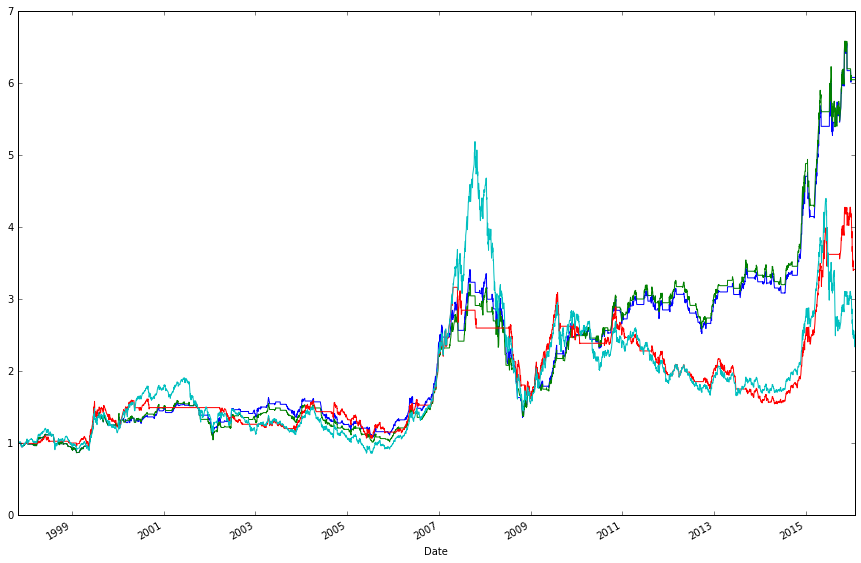

In [23]:
signal1 = (pd_sh['delta_ret_vol'] > pd_sh['ma_delta_ret_vol']) * 1
signal1[signal1 == 0] = 0
signal2 = (pd_sh['delta_spread_vol'] > pd_sh['ma_delta_spread_vol'] ) * 1
signal3 = (pd_sh['ma_delta_ret_vol'] > 0) *1

ret_str1 = signal1.shift(1) * pd_sh['ret_cc']
(1+ret_str1).cumprod().plot()

ret_str2 = signal2.shift(1) * pd_sh['ret_cc']
(1+ret_str2).cumprod().plot()

ret_str3 = signal3.shift(1) * pd_sh['ret_cc']
(1+ret_str3).cumprod().plot()

(1+pd_sh['ret_cc']).cumprod().plot(figsize=[15,10])

In [6]:
ret_str1.groupby(ret_str1.index.year).sum()

1997    0.005700
1998   -0.177299
1999    0.068437
2000   -0.038398
2001   -0.069956
2002   -0.037781
2003    0.061309
2004   -0.185404
2005   -0.021922
2006    0.687931
2007    0.296431
2008   -0.248201
2009    0.392867
2010    0.172525
2011    0.145184
2012    0.163880
2013    0.123709
2014    0.390071
2015    0.462273
2016    0.000000
dtype: float64

In [5]:
goog['log_ret'] = np.log(goog['Close'] / goog['Close'].shift(1))